In [1]:
import random 
from deap import base 
from deap import creator 
from deap import tools 
from deap import algorithms


In [2]:
creator.create("FitnessMax",base.Fitness,weights=(1.0,)) #Create type for store individual (in this example we use list) 
creator.create("Individual", list, fitness=creator.FitnessMax)

In [3]:
def randBool():
    return random.random()>0.5

In [4]:
# The items number (that means –the size of the problem)
import csv
NUMBER_OF_ITEMS= 50 # The max weight of the items in the bag (the max number of the items depend on the MAX_WEIGHT)
MAX_WEIGHT = 30 # Description of the problem# the code below may be replaced with loading the problem from the file)
items = {}
items = {}
i = 0
with open('KP_50_30.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        items[i] = (int(row['weight']), float(row['profit']))
        i+=1
print(items)

{0: (3, 70.21492310376361), 1: (1, 28.399698840910016), 2: (1, 35.33844553039964), 3: (10, 89.94458498742748), 4: (9, 27.47186630391798), 5: (1, 72.68667344389279), 6: (5, 87.19466706284464), 7: (9, 92.08347592733178), 8: (2, 12.60163522020843), 9: (5, 50.77035537546087), 10: (4, 70.39624270866331), 11: (7, 85.07791563457316), 12: (9, 73.19475030022171), 13: (7, 39.49790927114003), 14: (2, 59.016923066474355), 15: (8, 83.73102056324315), 16: (4, 10.573883661642514), 17: (1, 74.47360663582818), 18: (4, 52.88279089458423), 19: (2, 74.09994946465628), 20: (2, 66.05683930682895), 21: (5, 71.3250280659016), 22: (7, 24.384297396313116), 23: (7, 53.12376321602865), 24: (9, 74.62860702354503), 25: (9, 64.29068926656728), 26: (1, 65.83981511701768), 27: (1, 78.99830526658455), 28: (2, 62.576856502881604), 29: (3, 73.42748287115934), 30: (1, 1.4994147517763734), 31: (4, 33.32573003634496), 32: (10, 74.5087098131479), 33: (3, 98.68190506717627), 34: (3, 66.1894744722987), 35: (8, 50.8832949912281

In [5]:
#Create toolbox for register needed functions
toolbox = base.Toolbox() #Register function used for initcontent of the individual (for the benchmark function are the real values)
toolbox.register("attribute_bool",randBool) #Register function used for init Population of the individuals
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute_bool, n=NUMBER_OF_ITEMS)#Register function for create population of individuals
toolbox.register("population",tools.initRepeat, list, toolbox.individual)

In [6]:
#Testing the registered function (look on the content of the individual)
ind1 = toolbox.individual()

In [7]:
pop = toolbox.population(n=50)
print(pop)

[[True, True, False, False, True, False, False, True, False, False, True, True, False, True, False, False, True, False, True, False, False, True, False, False, False, True, True, True, False, False, False, True, False, False, False, True, True, False, True, True, True, True, False, True, True, False, False, True, False, False], [True, True, True, False, False, False, True, False, True, False, True, False, True, True, True, False, False, False, False, True, False, True, True, False, False, True, False, True, False, True, True, True, True, True, False, False, True, True, False, False, True, False, False, False, True, True, True, True, False, False], [False, True, False, True, False, False, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, True, True, True, True, False, True, True, True, True, False, False, False, True, True, True, False, True, False, True], [False, False,

In [8]:
def fitness_profit(individual):
    profit = 0
    for item in range(len(individual)):
        if(individual[item]): 
            profit+= items[item][1]
    return profit

In [9]:
def fitness_weight(individual):
    weight = 0
    for item in range(len(individual)):
        if(individual[item]): 
            weight+= items[item][0]
    return weight

In [10]:
from math import sin

def evalFct(individual):
    """Evaluation function for the individual."""
    x = individual[0]
    return (x - 5)**2 * sin(x) * (x/3),

def feasible(individual):
    """Feasibility function for the individual. Returns True if feasible False
    otherwise."""
    if 3 < individual[0] < 7:
        return True
    return False

def distance(individual):
    """A distance function to the feasibility region."""
    return (individual[0] - 5.0)**2


toolbox.register("evaluate", evalFct)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 7.0, distance))

In [11]:
def fitness(individual):
    f_p = fitness_profit(individual)
    f_w = fitness_weight(individual)
    if(f_w > MAX_WEIGHT):
      
        # penalty of the f_p, if the solution is not feasible)
        # the penalty value depends on the distance from  feasible point
        return f_p/(f_w -MAX_WEIGHT)**6,
        # k = 6
    else:
        return f_p,

In [12]:
def fitness_info(individual):
    weight = 0 
    profit = 0
    ni = 0 #number of items
    for item in range(len(individual)):
        if(individual[item]): 
            weight += items[item][0]
            profit += items[item][1]
            ni += 1
    return profit, weight, ni

In [13]:
print(fitness_profit(ind1))
print(fitness_weight(ind1))
print(fitness(ind1))
print(fitness_info(ind1))

1278.5063124084145
87
(3.727809773199446e-08,)
(1278.5063124084145, 87, 20)


In [14]:
#Definition of the mutation function 
def mutBool(ind):
    pos = random.randint(0,len(ind)-1)
    ind[pos] = not ind[pos]

In [15]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate",mutBool)
toolbox.register("select",tools.selRoulette) #toolbox.register("select",tools.selTournament, tournsize=3)
toolbox.register("evaluate",fitness)

In [16]:
import numpy
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg",numpy.mean)
stats.register("std",numpy.std)
stats.register("min",numpy.min)
stats.register("max",numpy.max)


In [17]:
def GA_ALG(CXPB,MUTPB,NGEN,N,stats):
    pop = toolbox.population(n=N) #(1)
    logbook = tools.Logbook()# Evaluate the entire population #(2)
    fitnesses = map(toolbox.evaluate, pop)
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit #Loop over generations
    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop)) #(3)# Clone the selected individuals
        offspring_map = map(toolbox.clone, offspring)
        offspring = ([x for x in offspring_map])
        # Apply crossover and mutation on the offspring #(4)
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values


        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values# Evaluate the individuals with an invalid fitness #(2)
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
             ind.fitness.values = fit# The population is entirely replaced by the
        pop[:] = offspring 
        record = stats.compile(pop)
        #print(record)
        logbook.record(gen=g, evals=len(invalid_ind), **record)
    return pop, logbook            

In [18]:
pop, logbook = GA_ALG(0.5,0.05,200,100,stats)
gen, avg, std, Min, Max = logbook.select('gen','avg','std','min','max')

No handles with labels found to put in legend.


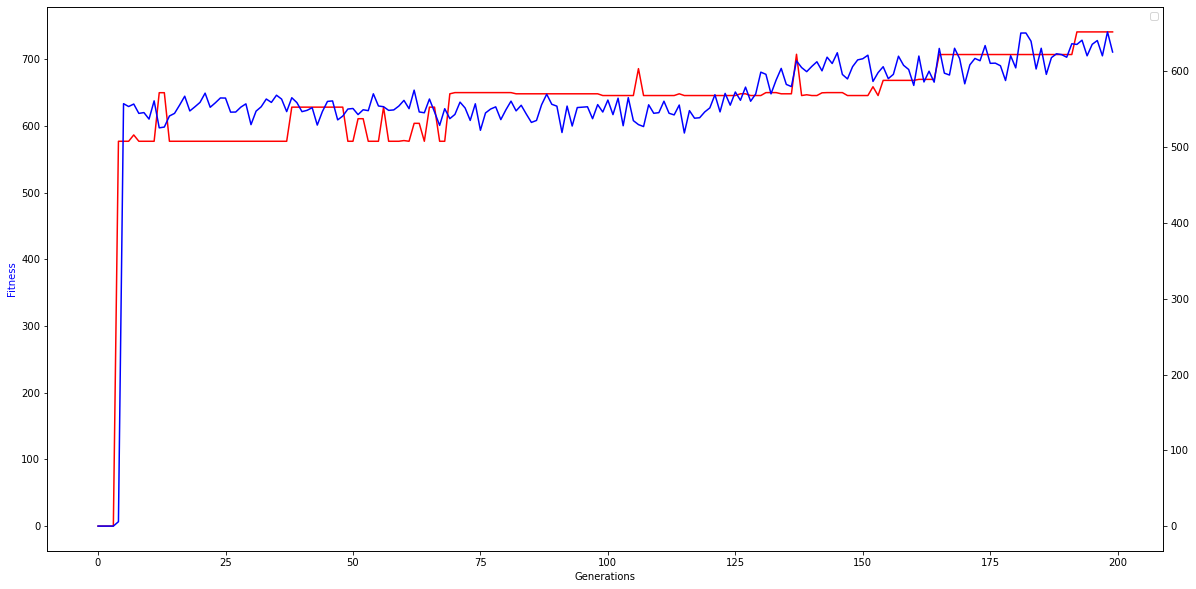

In [19]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
line1 = ax1.plot(gen, Max, "r-")
ax1.legend()
ax2 = ax1.twinx()
line2 = ax2.plot(gen, avg, "b-")
ax1.set_xlabel("Generations")
ax1.set_ylabel("Fitness", color="b")
plt.show()

In [20]:
evaluates = [fitness_info(p) for p in pop]
evaluates

[(707.21539985469, 31, 11),
 (707.21539985469, 31, 11),
 (707.21539985469, 31, 11),
 (669.9533106722097, 31, 12),
 (633.1154503900337, 29, 10),
 (707.21539985469, 31, 11),
 (742.5538453850896, 32, 12),
 (633.1154503900337, 29, 10),
 (633.1154503900337, 29, 10),
 (707.21539985469, 31, 11),
 (707.21539985469, 31, 11),
 (707.21539985469, 31, 11),
 (633.1154503900337, 29, 10),
 (742.5538453850896, 32, 12),
 (668.4538959204333, 30, 11),
 (668.4538959204333, 30, 11),
 (707.21539985469, 31, 11),
 (707.21539985469, 31, 11),
 (705.8021238339265, 30, 11),
 (741.1405693643261, 31, 12),
 (596.5258278010505, 28, 11),
 (741.1405693643261, 31, 12),
 (668.4538959204333, 30, 11),
 (707.21539985469, 31, 11),
 (741.1405693643261, 31, 12),
 (705.8021238339265, 30, 11),
 (679.0277795820758, 34, 12),
 (633.1154503900337, 29, 10),
 (707.21539985469, 31, 11),
 (707.21539985469, 31, 11),
 (707.21539985469, 31, 11),
 (707.21539985469, 31, 11),
 (658.9058073161812, 31, 11),
 (658.9058073161812, 31, 11),
 (741.14

In [27]:
import numpy as np
l1 = [ i/10 for i in range(2,5)]
l2 = [i/100 for i in range (2,5)]
l3 = [i*100 for i in range (3,6)]
max_ = []
average = []
min_ = []
for cxp,pr,st in zip(l1,l2,l3):
            _max = 0.0
            max_list =[]
            print(cxp,pr,st)
            for i in range (0,30):
                pop, logbook = GA_ALG(cxp,pr,st,100,stats)
                evaluates = [fitness_info(p) for p in pop]
                
                ev_ok = [ev for ev in evaluates if ev[1]<=30]
                if len(ev_ok)==0:
                    pass
                else:    
                    buf = max(ev_ok,key= lambda x: x[0])
                    #print (f'Repeat: {i}, value: {buf}')
                    max_list.append(buf[0])
                    if _max <buf[0]:
                        _max = buf[0]
                
            max_.append(_max)
            average.append(sum(max_list)/len(max_list))
            min_.append(min(max_list))
            
            
            print(cxp,pr,st)    
            print(f'max ={_max}') 
            print(f'average: {sum(max_list)/len(max_list)}')
            print(f'min: {min(max_list)}')
# The algorithm (GA2) generates three values in each rotation. The values are contained inside an array.
# If all the values in a single column (row1 = max, row2 = average, row3 = min) hits the highest score it can be considered that the corresponding column related to 
# i'th iteration has achived the best result. If not the best result is achieved the applied conditions then looks for the next best results and generates a remark
# based on the potency of the values. 

i=[max_.index(max(max_)), min_.index(min(min_)),average.index(max(average))]
j=0
for k in i:
    if i.count(k)>1:
        j=k
g=0       
for t in range(j):
    g=l1[j]
print("As we can see for cxp:",g,"the algorithm gives the best result")       
        
        

0.2 0.02 300
0.2 0.02 300
max =876.8355281150739
average: 668.5537103003618
min: 401.8265448980765
0.3 0.03 400
0.3 0.03 400
max =996.6420857092983
average: 730.2550606273259
min: 403.35633893283733
0.4 0.04 500
0.4 0.04 500
max =1011.4610979958427
average: 739.556319216967
min: 557.687890200461
2
2
0.4
0.4
As we can see for cxp: 0.4 the algorithm gives the best result
